In [80]:
#Company_Data

In [81]:
#Import Necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split, KFold, cross_val_score
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 500
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import r2_score, classification_report
%matplotlib inline

In [82]:
#Read The Dataset
df = pd.read_csv('https://raw.githubusercontent.com/KJanhavi2424/My-Datasets/main/Company_Data.csv')
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [83]:
df2 = df.drop(columns=['ShelveLoc','Urban','US'])
df2

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
0,9.50,138,73,11,276,120,42,17
1,11.22,111,48,16,260,83,65,10
2,10.06,113,35,10,269,80,59,12
3,7.40,117,100,4,466,97,55,14
4,4.15,141,64,3,340,128,38,13
...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14
396,6.14,139,23,3,37,120,55,11
397,7.41,162,26,12,368,159,40,18
398,5.94,100,79,7,284,95,50,12


In [84]:
#Model Building
x = df2.iloc[:,:-1]
y = df2['Sales']

In [85]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25, random_state=1)

In [86]:
rf = RandomForestRegressor()
rf.fit(xtrain,ytrain)
ypred = rf.predict(xtest)

In [87]:
ypred

array([ 5.9566,  9.3424,  2.9852, 11.5075,  9.0103,  7.7854,  2.5388,
        6.6446,  7.7856,  6.956 ,  1.3824,  7.7917,  8.0348,  2.7318,
        7.5275,  8.6868,  9.0907, 10.7099,  4.4151,  3.4609,  6.8982,
        4.6887,  4.9508,  4.8066, 12.3615,  4.5487,  5.9809,  5.9442,
        8.6791,  8.2125,  7.5228,  4.1541,  1.2624,  6.6789,  6.6304,
        8.0191,  5.3892,  5.3033,  7.4035, 12.3894,  6.5343,  8.7343,
       12.5777,  1.971 ,  5.8586,  8.4054,  8.4093,  5.8933,  7.7174,
        7.2473,  4.91  ,  6.6828, 11.1911, 13.8894,  8.2305,  7.5612,
       13.2187,  8.7799,  3.4708,  8.7782,  8.5495,  9.0116,  9.4625,
        6.8877,  5.3089,  7.4851,  1.5117,  9.4903, 12.0234,  6.8658,
        9.6848,  5.5707,  8.653 ,  8.6732, 11.9277,  6.8799,  7.9513,
        4.9626,  9.5121,  4.0957,  8.8609,  5.8535,  9.3962, 11.0188,
        5.3104,  7.335 ,  3.922 ,  8.2268,  6.1219,  6.5224,  9.3331,
        6.9686,  5.33  ,  5.99  ,  2.8256,  8.558 ,  7.805 ,  8.7432,
        7.6805,  6.3

In [88]:
from sklearn.metrics import mean_squared_error
import numpy as np

In [89]:
print(f"R2value:{r2_score(ytest,ypred)}")
print(f"MSE:{mean_squared_error(ytest,ypred)}")
print(f"RMSE:{np.sqrt(mean_squared_error(ytest,ypred))}")

R2value:0.9935916105740107
MSE:0.04726449920000001
RMSE:0.21740399996320217


In [90]:
#Plotting Regressor

len(rf.estimators_)

100

In [91]:
rf.estimators_[99]

DecisionTreeRegressor(max_features=1.0, random_state=1336582240)

In [92]:
from sklearn import tree

[Text(0.5, 0.875, 'Sales <= 7.925\nsquared_error = 8.329\nsamples = 188\nvalue = 7.566'),
 Text(0.25, 0.625, 'Sales <= 5.76\nsquared_error = 2.152\nsamples = 108\nvalue = 5.466'),
 Text(0.125, 0.375, 'Sales <= 3.995\nsquared_error = 0.925\nsamples = 61\nvalue = 4.539'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'Sales <= 7.135\nsquared_error = 0.433\nsamples = 47\nvalue = 6.99'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'Sales <= 10.875\nsquared_error = 2.733\nsamples = 80\nvalue = 10.389'),
 Text(0.625, 0.375, 'Sales <= 9.4\nsquared_error = 0.572\nsamples = 52\nvalue = 9.345'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'Sales <= 12.285\nsquared_error = 1.177\nsamples = 28\nvalue = 12.25'),
 Text(0.8125, 0.125, '\n  (...)  \n'),
 Text(0.9375, 0.125, '\n  (...)  \n')]

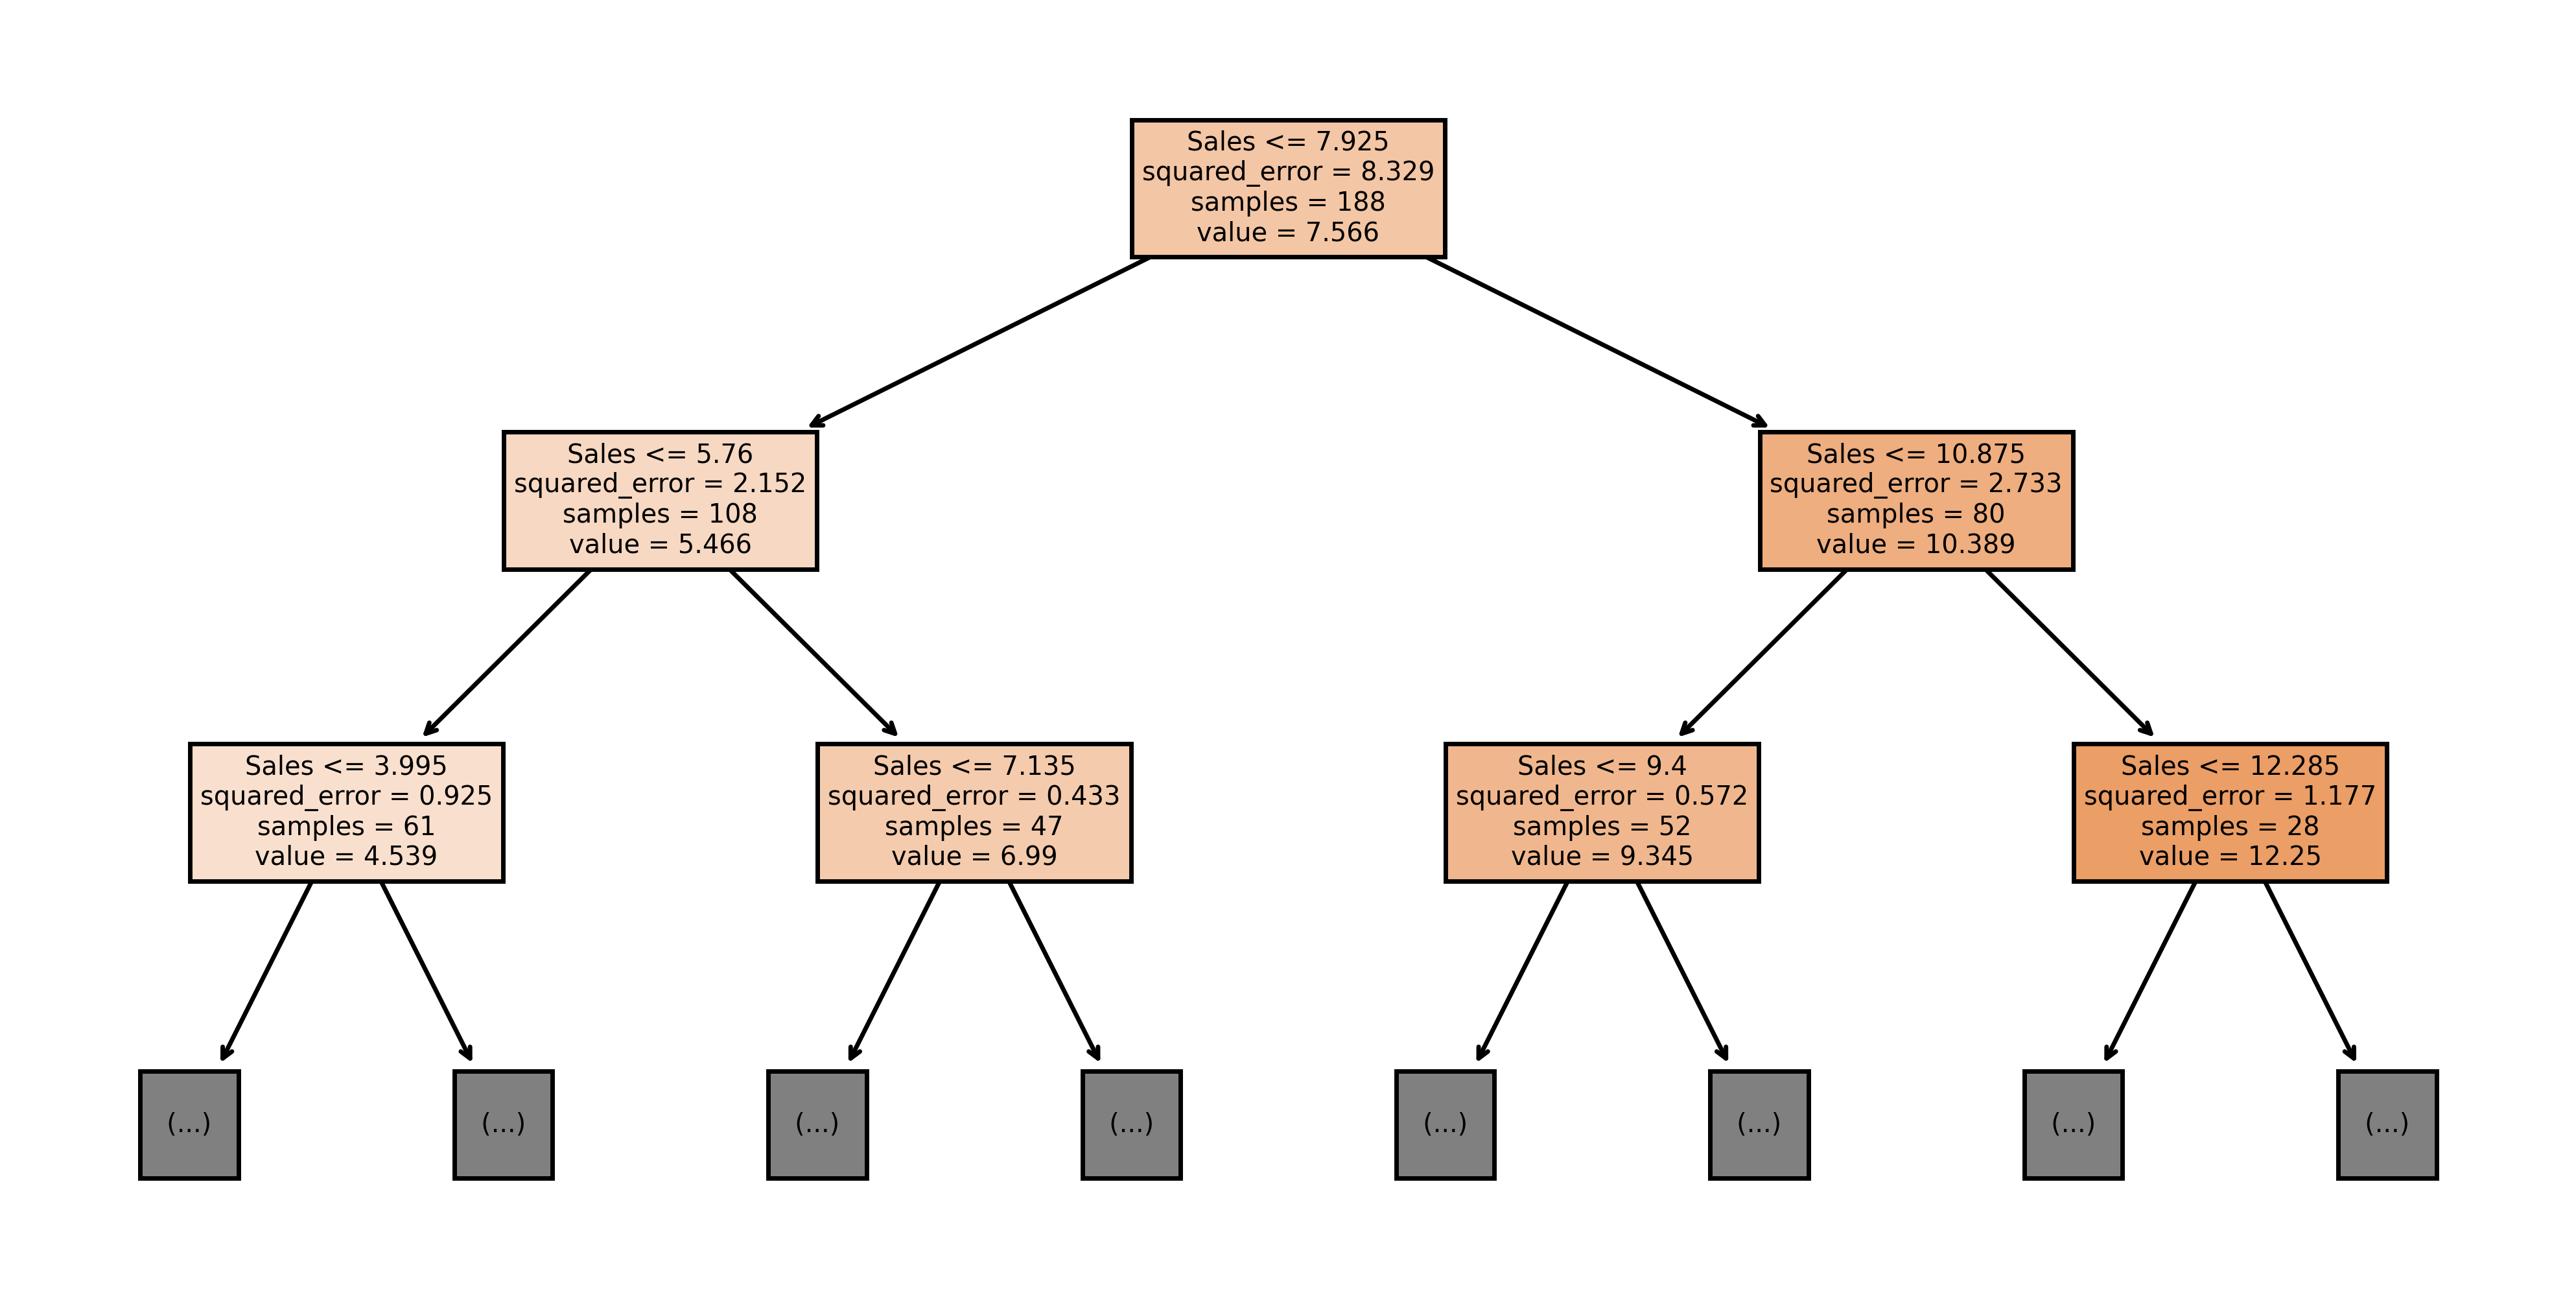

In [93]:
tree.plot_tree(rf.estimators_[1],feature_names=x.columns,filled=True,max_depth=2)

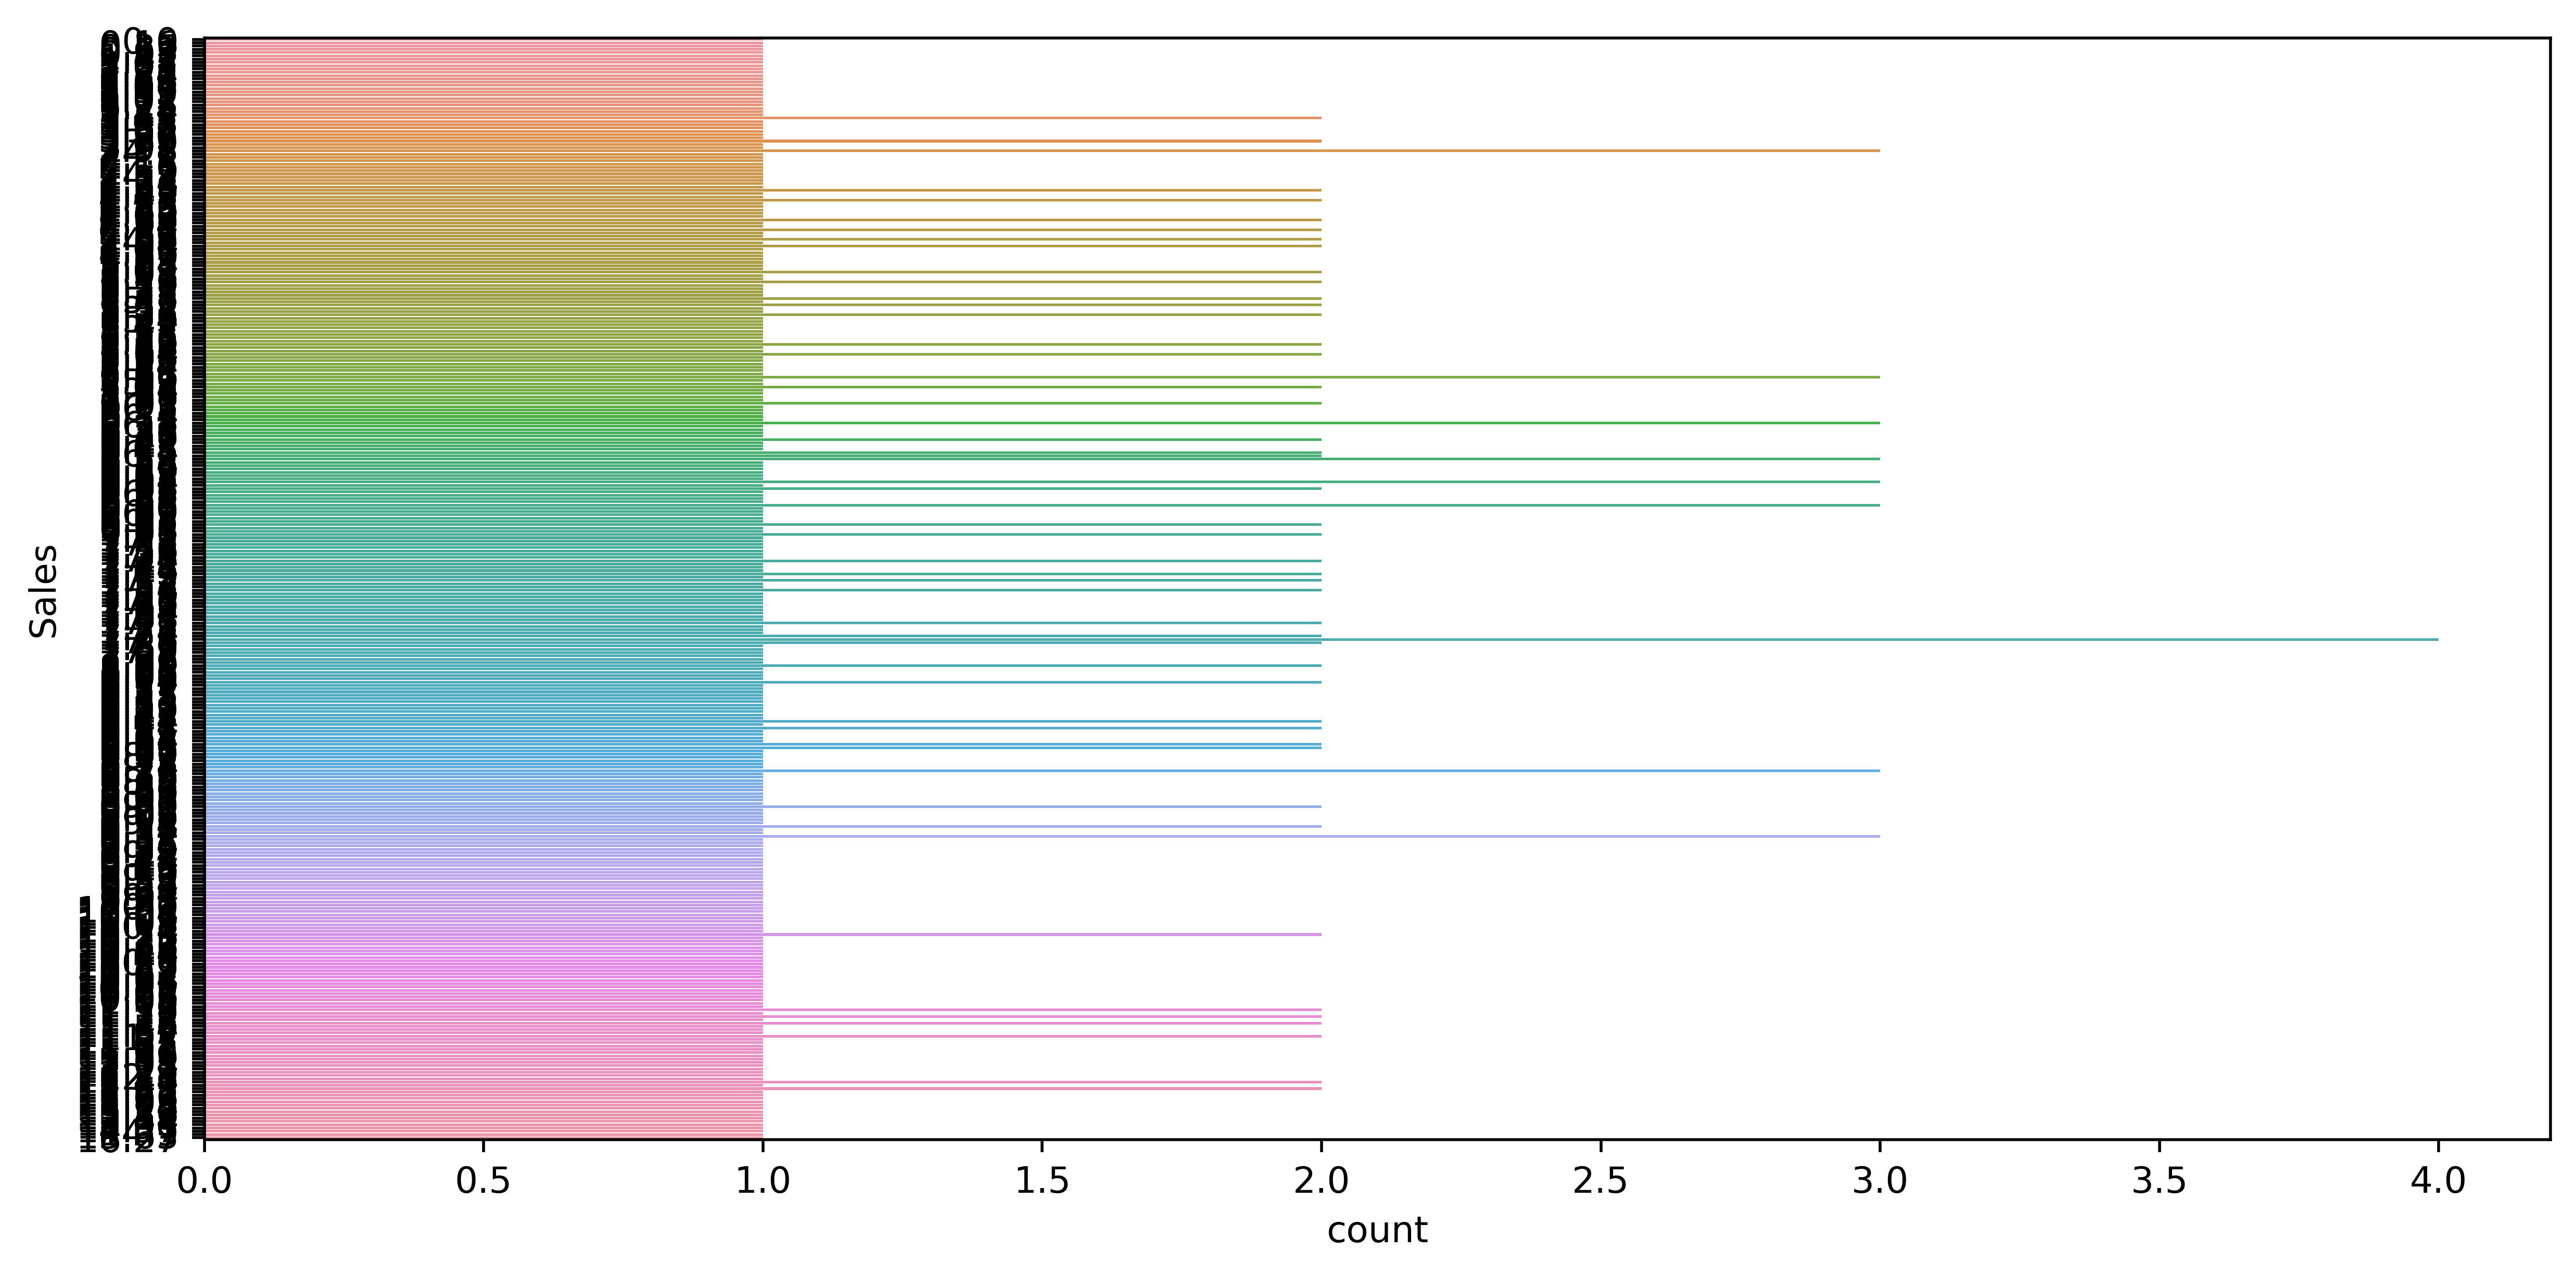

In [94]:
sns.countplot(y=df2['Sales'])
plt.tight_layout()
plt.show()